In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import quandl

## Part 1 - Data Preprocessing

- __Step 1__: Importing the training set<br>
.
- __Step 2__: Feature Scaling
    - Normalizing data to be between 0 and 1
    - To make process efficient, faster, and accurate
    - Using Sigmoid activation

- __Step 3__: Creating a data structure with 60 timesteps and 1 output
    - Need to make prediction for last 60 days
    - 

- __Step 4__: Reshaping data
    - Reshaping data to make it 3D vector, since RNN doesn't accept 2D vectors

In [ ]:
g_stocks = quandl.get()

In [67]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = df_train.iloc[:, 1:2].values

In [68]:
print(f'{df_train.head()} \
    \n-------------------------------------------------------')

print(f'{df_train.info()} \
    \n-------------------------------------------------------')
print(df_train.describe())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800     
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.0+ KB
None     
-------------------------------------------------------
              Open         High          Low
count  1258.000000  1258.000000  1258.000000
mean    533.709833   537.880223   529.007409
std     151.904442   153.008811   150.552807
min     2

In [69]:
sc = MinMaxScaler(feature_range=(0, 1))
train_set = sc.fit_transform(train_set)

In [70]:
sc.scale_

array([0.00186026])

In [71]:
train_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [72]:
train_set.shape

(1258, 1)

In [73]:
X_train = train_set[0:1257]
y_train = train_set[1:1258]

In [74]:
X_train.shape

(1257, 1)

In [75]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [76]:
X_train.shape

(1257, 1, 1)

In [77]:
# X_train = []
# y_train = []
# for i in range(60, 1258):
#     X_train.append(train_set_scaled[i-60:i, 0])
#     y_train.append(train_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

In [78]:
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

- __Step 1__: Initialising the RNN
    - Using Sequential since RNN goes in a sequence    
- __Step 2__: Adding the first LSTM layer and some Dropout regularisation
- __Step 3__: Adding a second LSTM layer and some Dropout regularisation
- __Step 4__: Adding a third LSTM layer and some Dropout regularisation
- __Step 5__: Adding a fourth LSTM layer and some Dropout regularisation
- __Step 6__: Adding the output layer
- __Step 7__: Compiling the RNN
- __Step 8__: Fitting the RNN to the Training set

In [79]:
def regressor_creation():
    regressor = Sequential()
    regressor.add(LSTM(units=4, 
                       activation='sigmoid', 
                       input_shape=(None, 1)))
    regressor.add(Dense(units=1))
#                        return_sequences=True,
#                        input_shape=(X_train.shape[1], 1)))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units=50, return_sequences=True))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units=50, return_sequences=True))
#     regressor.add(Dropout(0.2))
#     regressor.add(LSTM(units=50))
#     regressor.add(Dropout(0.2))
#     regressor.add(Dense(units=1))
    regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
    return regressor

In [80]:
regressor = regressor_creation()

In [81]:
regressor.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
1257/1257 [==============================] - 1s 1ms/step - loss: 0.0943
Epoch 2/200
1257/1257 [==============================] - 0s 127us/step - loss: 0.0814
Epoch 3/200
1257/1257 [==============================] - 0s 141us/step - loss: 0.0773
Epoch 4/200
1257/1257 [==============================] - 0s 152us/step - loss: 0.0752
Epoch 5/200
1257/1257 [==============================] - 0s 143us/step - loss: 0.0732
Epoch 6/200
1257/1257 [==============================] - 0s 150us/step - loss: 0.0714
Epoch 7/200
1257/1257 [==============================] - 0s 154us/step - loss: 0.0695
Epoch 8/200
1257/1257 [==============================] - 0s 148us/step - loss: 0.0676
Epoch 9/200
1257/1257 [==============================] - 0s 146us/step - loss: 0.0657
Epoch 10/200
1257/1257 [==============================] - 0s 152us/step - loss: 0.0638
Epoch 11/200
1257/1257 [==============================] - 0s 152us/step - loss: 0.0620
Epoch 12/200
1257/1257 [==============================

1257/1257 [==============================] - 0s 159us/step - loss: 2.5069e-04
Epoch 183/200
1257/1257 [==============================] - 0s 143us/step - loss: 2.4999e-04
Epoch 184/200
1257/1257 [==============================] - 0s 145us/step - loss: 2.5240e-04
Epoch 185/200
1257/1257 [==============================] - 0s 144us/step - loss: 2.5255e-04
Epoch 186/200
1257/1257 [==============================] - 0s 133us/step - loss: 2.5163e-04
Epoch 187/200
1257/1257 [==============================] - 0s 134us/step - loss: 2.5108e-04
Epoch 188/200
1257/1257 [==============================] - 0s 131us/step - loss: 2.4633e-04
Epoch 189/200
1257/1257 [==============================] - 0s 158us/step - loss: 2.5052e-04
Epoch 190/200
1257/1257 [==============================] - 0s 167us/step - loss: 2.5219e-04
Epoch 191/200
1257/1257 [==============================] - 0s 152us/step - loss: 2.4962e-04
Epoch 192/200
1257/1257 [==============================] - 0s 136us/step - loss: 2.5013e-04
Ep

## Part 3 - Making the predictions and visualising the results

- __Step 1__: Getting the real stock price of 2017
- __Step 2__: Getting the predicted stock price of 2017
- __Step 3__: Visualising the results

In [82]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_price = df_test.iloc[:, 1:2].values

In [90]:
inputs = real_price
inputs = sc.transform(inputs)
inputs = inputs.reshape(20, 1, 1)

In [94]:
pred_price = regressor.predict(inputs)
pred_price = sc.inverse_transform(pred_price)

In [87]:
# df_total = pd.concat(
#     (df_train['Open'], df_test['Open']), axis=0)
# inputs = df_total[len(df_total) - len(df_test) - 60:].values
# inputs = inputs.reshape(-1, 1)
# inputs = sc.transform(inputs)

In [88]:
# X_test = []
# for i in range(60, 80):
#     X_test.append(inputs[i-60:i, 0])

In [89]:
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [85]:
pred_price = regressor.predict(X_test)
pred_price = sc.inverse_transform(pred_price)

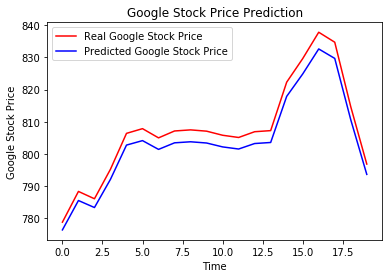

In [95]:
plt.plot(real_price, color='red', label='Real Google Stock Price')
plt.plot(pred_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()